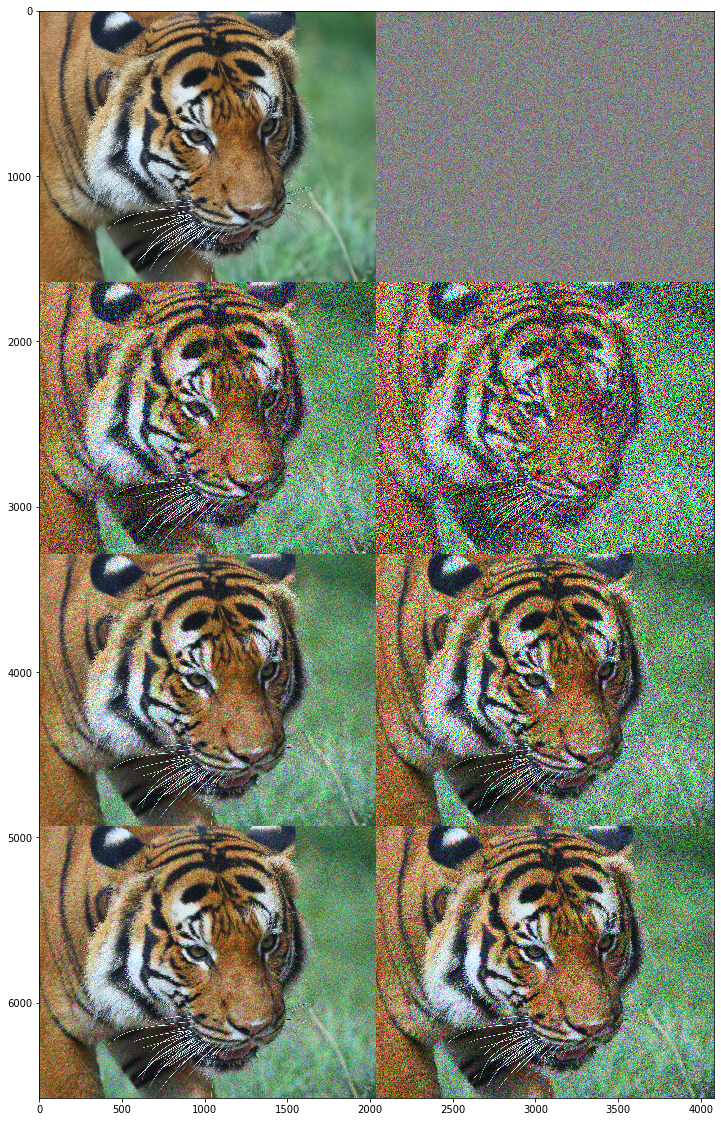

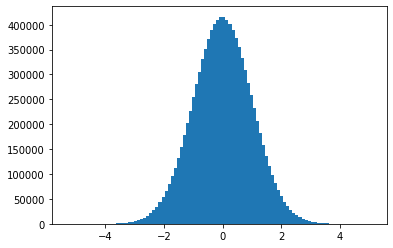

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("0010.png")[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()

Source image shape (1644, 2040, 3)
LR same resolution image shape (1644, 2040, 3)
LR same resolution image with noise shape (1644, 2040, 3)


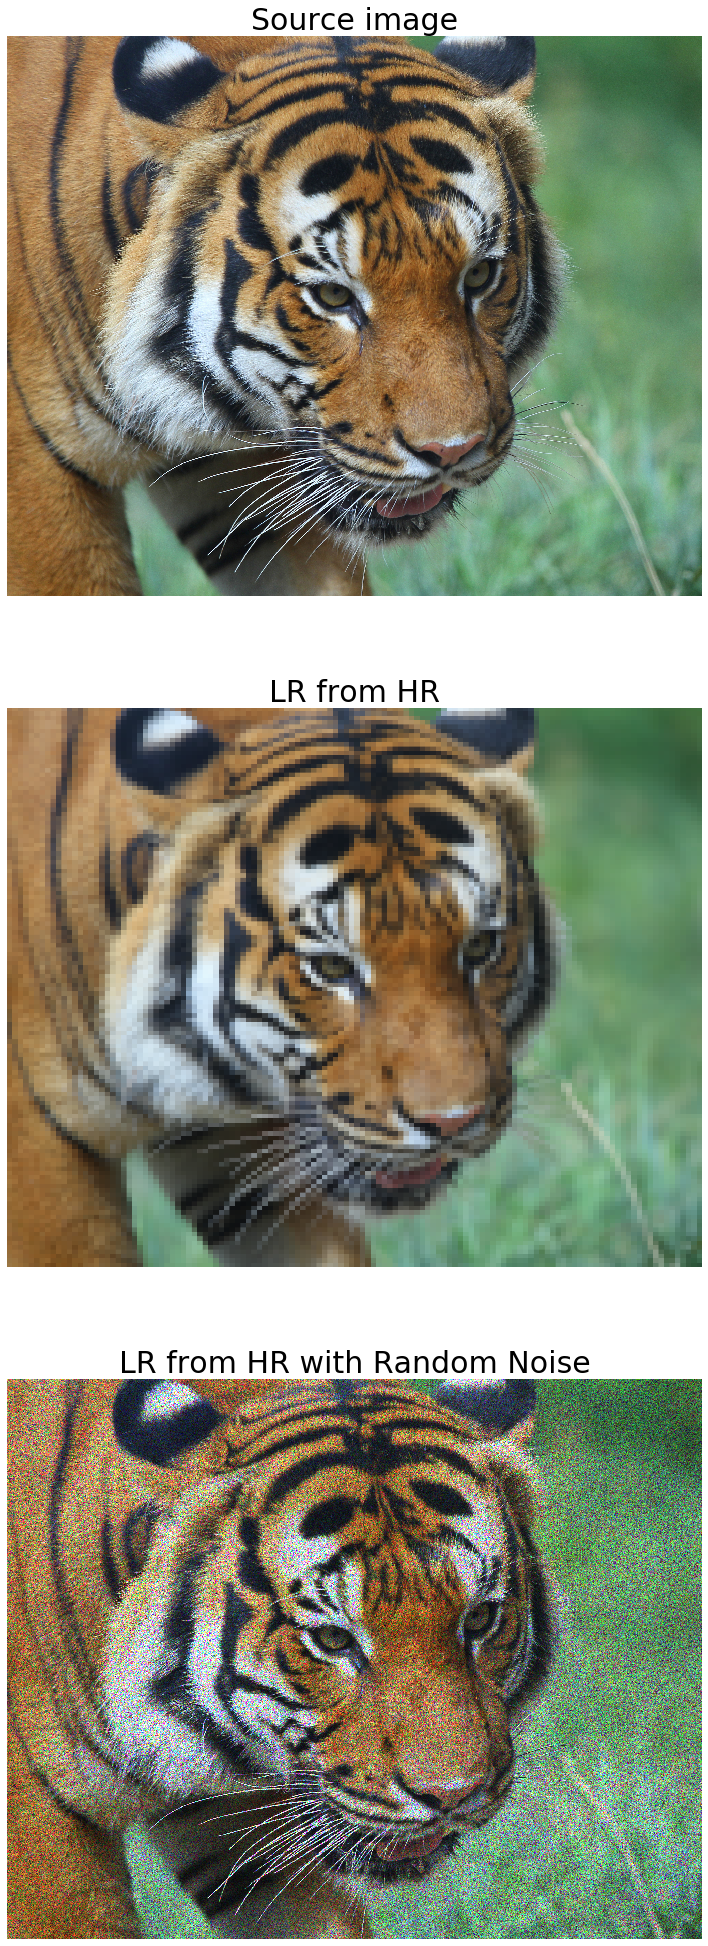

In [40]:
#Method for generate LR image from HR image with same resolution 
import numpy as np
import cv2
import matplotlib.pyplot as plt
s=128
img = cv2.imread("0010.png")[...,::-1]/255.0
Lr_img=cv2.resize(img , (s,s), interpolation = cv2.INTER_AREA)
high,row,ch=img.shape
Lr_w_sameres=cv2.resize(Lr_img , (row,high), interpolation = cv2.INTER_AREA)
#add noise
noise =  np.random.normal(loc=0, scale=1, size=Lr_w_sameres.shape)
noisy2mul = np.clip((Lr_w_sameres*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

plt.figure(figsize=(35,35))
print('Source image shape',img.shape)
plt.subplot(3,1,1)
plt.imshow(img)
plt.axis('off') 
plt.title('Source image', fontsize=30)

''''
print('LR image shape',Lr_img.shape)
plt.subplot(3,1,2)
plt.imshow(Lr_img)
plt.axis('off')
plt.title('LR image', fontsize=30)
'''''

print('LR same resolution image shape',Lr_w_sameres.shape)
plt.subplot(3,1,2)
plt.imshow(Lr_w_sameres)
plt.axis('off')
plt.title('LR from HR', fontsize=30)

print('LR same resolution image with noise shape',noisy4mul.shape)
plt.subplot(3,1,3)
plt.imshow(noisy4mul)
plt.axis('off')
plt.title('LR from HR with Random Noise', fontsize=30)


plt.show()